# ImmoEliza Data Analysis

**This repository is contains Data Analysis for a fictional real estate company called "ImmoEliza". I created it as part of my [BeCode](https://www.becode.org) AI Bootcamp training in 2023.**

The data used in this project was sourced from the repository [ImmoEliza: Collecting Data](https://github.com/DeFre/ImmoEliza-collecting-data) which was used to collect data on 10.000 properties from Immoweb.

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import time

pd.set_option('display.min_rows', 10)

## Import Data

In [2]:
properties_raw = pd.read_csv("../data/scraped_data_10_Myt.csv")
display(properties_raw)

,Type of property,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Number of frontages,Construction year,Building condition,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type
0,penthouse,turnhout,2300,10666429,€,Grote Markt 22,4,C,218,No,...,4,1997,As new,0,1,0,0,2,0,Gas
1,house,essen,2910,10666428,€469000,Heidestatiestraat 26,3,D,390,No,...,4,0,0,0,1,0,0,2,Installed,0
2,house,bierges,1301,10666426,€1395000,"Rue de Wavre, 27",5,C,178,0,...,4,1988,Good,0,2,3,Yes,4,Hyper equipped,Fuel oil
3,apartment,arlon,6700,10666424,€285000,Avenue de Longwy 340,2,D,299,0,...,2,0,Good,0,2,0,0,2,Installed,Electric
4,house,arlon,6700,10666423,€285000,Avenue de Longwy 340,2,D,299,0,...,2,0,Good,0,2,0,0,2,Installed,Electric
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10134,villa,schilde,2970,10642946,€1199000,Donksesteenweg 212,6,B,199,No,...,0,0,As new,0,2,0,No,3,Installed,Gas
10135,duplex,bierbeek%20korbeek-lo,3360,10531808,€450000,Herbert Hooverplein 14,3,B,120,No,...,2,2007,Good,0,2,0,0,0,Hyper equipped,Gas
10136,penthouse,braine-l%27alleud,1420,10642943,€699000,Avenue Alphonse Allard 288,3,Not specified,Not specified,No,...,3,2021,0,0,2,0,0,0,0,0
10137,house,wevelgem,8560,10642937,€340000,Markeplaats 9,4,B,161,0,...,0,1967,0,0,0,0,No,0,0,0


## Cleaning Data

### Remove "empty" rows and rows without a price

In [3]:
# Remove "empty" rows and rows without a price

print(properties_raw.shape[0])
#properties_raw = properties_raw.drop(properties_raw[(properties_raw.Price == 0) & (properties_raw.Address == 0) & (properties_raw.Bedrooms == 0) & (properties_raw.Furnished == 0)].index, inplace=True) #remove lines full of 0
properties_raw = properties_raw[properties_raw.loc[:, "Address"].astype(str).str.strip() != '0'] #solution by Jonathan #removes "empty" rows
print(properties_raw.shape[0])
properties_raw = properties_raw[properties_raw.loc[:, "Price"].astype(str).str.strip() != '€'] #removes rows without a price
#display(properties_raw)
print(properties_raw.shape[0])


10139
9446
8977


### Remove all non-numerical data from Price

In [4]:
# Remove all non-numerical data from Price, drop properties without a price and with prices over 3M or under 10K

print("number of properties before: ",properties_raw.shape[0])
properties_raw["Price2"] = properties_raw.loc[:, "Price"].str.replace("\D", "", regex = True)
properties_raw = properties_raw[properties_raw.loc[:, "Price2"].astype(str).str.strip() != ''] #remove rows without a price
properties_raw["Price2"] = properties_raw["Price2"].astype(int) #Turn "Price 2 into an Integer"
properties_raw = properties_raw.drop(properties_raw[properties_raw['Price2'] > 30000000].index) #removes properties costing more than 3M
properties_raw = properties_raw.drop(properties_raw[properties_raw['Price2'] < 45000].index) #removes properties costing less than 45K
print("number of properties after: ",properties_raw.shape[0])



number of properties before:  8977
number of properties after:  8609


In [5]:
# Turn Price into an integer but keep the original Price column a Price_orig
properties_raw["Price_orig"] = properties_raw["Price"]
properties_raw["Price"] = properties_raw["Price2"]
properties_raw = properties_raw.drop(columns=["Price2"])
display(properties_raw)

,Type of property,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Construction year,Building condition,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price_orig
1,house,essen,2910,10666428,469000,Heidestatiestraat 26,3,D,390,No,...,0,0,0,1,0,0,2,Installed,0,€469000
2,house,bierges,1301,10666426,1395000,"Rue de Wavre, 27",5,C,178,0,...,1988,Good,0,2,3,Yes,4,Hyper equipped,Fuel oil,€1395000
3,apartment,arlon,6700,10666424,285000,Avenue de Longwy 340,2,D,299,0,...,0,Good,0,2,0,0,2,Installed,Electric,€285000
4,house,arlon,6700,10666423,285000,Avenue de Longwy 340,2,D,299,0,...,0,Good,0,2,0,0,2,Installed,Electric,€285000
5,apartment,antwerp,2000,10666422,425000,"Grote steenweg, 511",2,C,254,0,...,0,As new,0,1,0,0,0,Installed,0,€425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10134,villa,schilde,2970,10642946,1199000,Donksesteenweg 212,6,B,199,No,...,0,As new,0,2,0,No,3,Installed,Gas,€1199000
10135,duplex,bierbeek%20korbeek-lo,3360,10531808,450000,Herbert Hooverplein 14,3,B,120,No,...,2007,Good,0,2,0,0,0,Hyper equipped,Gas,€450000
10136,penthouse,braine-l%27alleud,1420,10642943,699000,Avenue Alphonse Allard 288,3,Not specified,Not specified,No,...,2021,0,0,2,0,0,0,0,0,€699000
10137,house,wevelgem,8560,10642937,340000,Markeplaats 9,4,B,161,0,...,1967,0,0,0,0,No,0,0,0,€340000


### Turns Furnished, Terrace & Office Binary

In [6]:
# Turn Yes/No into 1/0

for i in ["Furnished", "Terrace", "Office"]:
    print(properties_raw[[i]].value_counts())
    properties_raw[i] = properties_raw[i].map({'Yes': 1, 'No': 0, '0':0, 0:0, 1:1})
    print(properties_raw[[i]].value_counts())
#display(properties_raw)

Furnished
0            4392
No           3973
Yes           244
Name: count, dtype: int64
Furnished
0            8365
1             244
Name: count, dtype: int64
Terrace
0          6346
Yes        2263
Name: count, dtype: int64
Terrace
0          6346
1          2263
Name: count, dtype: int64
Office
0         5388
No        2003
Yes       1218
Name: count, dtype: int64
Office
0         7391
1         1218
Name: count, dtype: int64


There seem to be a lot of properties marked as not having terrace, yet including a terrace surface. If a property has a terrace surface we will assume this implies it has a terrace. Will this make a difference?

In [7]:
properties_raw["Terrace2"] = np.where(properties_raw["Terrace surface"] !=0, 1, properties_raw["Terrace"])
print(properties_raw["Terrace"].value_counts())
print(properties_raw["Terrace2"].value_counts())

Terrace
0    6346
1    2263
Name: count, dtype: int64
Terrace2
1    5148
0    3461
Name: count, dtype: int64


Yes. As you can see the number of terraces has more than doubled. 

In [8]:
# Replace the values in Terrace with the ones from Terrace2 and drop Terrace
properties_raw["Terrace"] = properties_raw["Terrace2"]
properties_raw = properties_raw.drop(["Terrace2"], axis=1)

### Property type & subtype
The column "Type of property" is a bit too specific. We will create two *supertypes* called "house" and "apartment" as they are not included in our scrape. 
Afterwards we will refer to these two supertypes as *"property_type"* and use *"property_subtype"* to refer to "kot", "castle", "villa", ...

In [9]:
properties_raw.rename(columns = {'Type of property':'property_subtype'}, inplace = True)
df_proptype = pd.read_csv("../data/propertytype.csv", encoding="latin-1")
properties_raw = properties_raw.merge(df_proptype, on=['property_subtype'], how='left')
properties_raw.sample(10)

,property_subtype,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Building condition,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price_orig,property_type
2198,mixed-use-building,walshoutem,3401,10661428,595000,Postlaan 1W4,0,C,272,0,...,To be done up,0,0,0,0,0,0,0,€595000,house
7714,villa,rhode-saint-genese,1640,10645696,1150000,Chaussée de Waterloo 1382,4,D,350,0,...,Good,0,2,1,0,3,Installed,Gas,€1150000,house
6798,ground-floor,kortrijk,8500,10648398,603000,Vlaskaai 6,3,A,65,0,...,0,0,2,0,0,2,Installed,Gas,€603000,apartment
5377,house,ambl%C3%A8ve,4770,10652729,191000,"Rue Centrale,30",2,D,290,1,...,Just renovated,0,1,1,0,1,Installed,0,€191000,house
2073,apartment,namur,5000,10661841,165000,Avenue du Bourgmestre Jean Materne 96/1,2,G,540,0,...,Good,0,1,1,0,1,Not installed,Gas,€165000,apartment
2684,apartment-block,li%C3%A8ge,4000,10659649,289000,Chaussée de Tongres 325,4,Not specified,Not specified,0,...,To renovate,0,0,4,0,4,Not installed,0,€289000,apartment
7583,apartment,ciney,5590,10646026,225000,Rue du Centre 5,3,B,132,0,...,Good,0,1,0,0,0,0,Gas,€225000,apartment
3957,apartment,antwerp,2000,10656162,495000,Museumstraat 50,2,C,290,0,...,Good,0,1,0,0,1,Semi equipped,Gas,€495000,apartment
3541,house,libin,6890,10657262,299900,rue des Corettes,3,A,76,0,...,0,0,1,0,0,2,Not installed,Gas,€299900,house
117,house,affligem,1790,10666201,694203,LEOPOLDSTRAAT 162,3,Not specified,Not specified,0,...,0,0,1,0,1,1,0,0,€694203,house


### Energy Class
Due to differences in definition in each region, it will be very hard to compare energy classes. But before we can discover that we have a bit of cleaning up to do. Our dataset includes a few weird Energy Classes ('G_F', 'C_B', 'G_A++'). As each of them only occurs once, we will add them to "not specified". Now the different categories at least look "normal".

In [10]:
#There were 3 weird variables in Energy Class with only one occurence, namely 'G_F', 'C_B', 'G_A++'. Added them tot "Not specified"

properties_raw["Energy class"]=np.where(properties_raw["Energy class"].isin(['G_F', 'C_B', 'G_A++']), "Not specified", properties_raw["Energy class"])

In [11]:
print(properties_raw[["Energy class"]].value_counts())

Energy class 
Not specified    1941
B                1364
C                1276
D                1093
F                1079
E                 785
A                 553
G                 464
A++                31
A+                 23
Name: count, dtype: int64


### Cleaning Postal codes
Postal Codes should be 4 numeric digits, but we have some errors. 

In [12]:
print("before:",properties_raw.shape[0])
properties_raw.rename(columns = {'postal code':'Postcode'}, inplace = True)
properties_raw["Postcode"] = properties_raw.loc[:, "Postcode"].astype(str).str.replace("\D", "", regex = True)
properties_raw['Postcode'] = properties_raw['Postcode'].astype(int)
properties_raw = properties_raw.drop(properties_raw[properties_raw['Postcode'] > 9999].index) #removes postal codes over 4 digits
print("after removing too high numbers:",properties_raw.shape[0])
properties_raw = properties_raw.drop(properties_raw[properties_raw['Postcode'] < 999].index) #removes postal codes of less than 4 digits
print("after:",properties_raw.shape[0])

before: 8609
after removing too high numbers: 8504
after: 8504


### Add Regions

In [13]:
df_localities = pd.read_csv("../data/postal_code-municipality-province.csv", encoding="latin-1")
df_localities = df_localities[['Postcode', 'Provincie']].drop_duplicates().reset_index(drop=True)
print(df_localities.head())

   Postcode                       Provincie
0      1000  Brussels Hoofdstedelijk Gewest
1      1030  Brussels Hoofdstedelijk Gewest
2      1040  Brussels Hoofdstedelijk Gewest
3      1050  Brussels Hoofdstedelijk Gewest
4      1060  Brussels Hoofdstedelijk Gewest


In [14]:
df_localities['Gemeenschap'] = np.where(
    df_localities.Provincie.isin(['Vlaams-Brabant', 'Antwerpen', 'Limburg', 'West-Vlaanderen', 'Oost-Vlaanderen']),
    'Flanders',
    np.where(df_localities.Provincie == 'Brussels Hoofdstedelijk Gewest',
             'Brussels',
             'Wallonia'
    )
)

In [15]:
df_localities["Postcode"].astype(int)
df_localities["Provincie"].astype(str)
df_localities["Gemeenschap"].astype(str)

0       Brussels
1       Brussels
2       Brussels
3       Brussels
4       Brussels
          ...   
1138    Flanders
1139    Flanders
1140    Flanders
1141    Flanders
1142    Flanders
Name: Gemeenschap, Length: 1143, dtype: object

In [16]:
df_localities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Postcode     1143 non-null   int64 
 1   Provincie    1143 non-null   object
 2   Gemeenschap  1143 non-null   object
dtypes: int64(1), object(2)
memory usage: 26.9+ KB


In [17]:
print(df_localities.sample(10))

      Postcode        Provincie Gemeenschap
129       2547        Antwerpen    Flanders
675       3118   Vlaams-Brabant    Flanders
293       4750          Liï¿½ge    Wallonia
1031      7810          Hainaut    Wallonia
1076      8583  West-Vlaanderen    Flanders
315       4970          Liï¿½ge    Wallonia
576       9750  Oost-Vlaanderen    Flanders
156       2940        Antwerpen    Flanders
834       5521            Namur    Wallonia
1006      7602          Hainaut    Wallonia


In [18]:
properties_raw = properties_raw.merge(df_localities, on=['Postcode'], how='left')
properties_raw.rename(columns = {'Provincie':'Province', 'Gemeenschap':'Region'}, inplace = True)
properties_raw.head()

,property_subtype,Location,Postcode,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price_orig,property_type,Province,Region
0,house,essen,2910,10666428,469000,Heidestatiestraat 26,3,D,390,0,...,1,0,0,2,Installed,0,€469000,house,Antwerpen,Flanders
1,house,bierges,1301,10666426,1395000,"Rue de Wavre, 27",5,C,178,0,...,2,3,1,4,Hyper equipped,Fuel oil,€1395000,house,Brabant wallon,Wallonia
2,apartment,arlon,6700,10666424,285000,Avenue de Longwy 340,2,D,299,0,...,2,0,0,2,Installed,Electric,€285000,apartment,Luxembourg,Wallonia
3,house,arlon,6700,10666423,285000,Avenue de Longwy 340,2,D,299,0,...,2,0,0,2,Installed,Electric,€285000,house,Luxembourg,Wallonia
4,apartment,antwerp,2000,10666422,425000,"Grote steenweg, 511",2,C,254,0,...,1,0,0,0,Installed,0,€425000,apartment,Antwerpen,Flanders


### seperate Dataframe for Primary Energy Consumption vs Price

In [19]:
energy_price_df = properties_raw.loc[:,["Price", "Energy class", "Primary energy consumption", "Postcode", "Province", "Region"]]
display(energy_price_df.sample(10))

,Price,Energy class,Primary energy consumption,Postcode,Province,Region
7961,1075000,B,153,9000,Oost-Vlaanderen,Flanders
3967,435000,D,397,9031,Oost-Vlaanderen,Flanders
750,295000,F,512,9820,Oost-Vlaanderen,Flanders
28,595000,D,190,1200,Brussels Hoofdstedelijk Gewest,Brussels
5643,669000,B,104,8300,West-Vlaanderen,Flanders
8129,498000,Not specified,Not specified,9290,Oost-Vlaanderen,Flanders
6129,695000,B,132,2800,Antwerpen,Flanders
3279,335000,F,531,3680,Limburg,Flanders
7702,289000,A,82,9120,Oost-Vlaanderen,Flanders
7309,335000,C,205,8370,West-Vlaanderen,Flanders


In [20]:
properties_raw["Primary energy consumption"]=pd.to_numeric(properties_raw["Primary energy consumption"], errors='coerce')
display(properties_raw.sample(10))

,property_subtype,Location,Postcode,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price_orig,property_type,Province,Region
3025,apartment,verviers,4800,10658674,239000,rue de Tilff 277,3,Not specified,NaN,0,...,2,0,0,1,Hyper equipped,Electric,€239000,apartment,Liï¿½ge,Wallonia
1763,apartment,verviers,4800,10662889,185000,"Rue des Minières, 65",2,B,162.0,0,...,1,0,0,1,Semi equipped,Gas,€185000,apartment,Liï¿½ge,Wallonia
515,apartment,leuven,3000,10666242,298000,Jan Stasstraat 3,1,B,166.0,0,...,1,0,0,0,0,Gas,€298000,apartment,Vlaams-Brabant,Flanders
4648,apartment,bastogne,6600,10654343,355000,Route de Marche 143,0,A,57.0,0,...,0,0,0,0,0,Gas,€355000,apartment,Luxembourg,Wallonia
7088,house,waterloo,1410,10647301,275000,Chaussée de Bruxelles 168,2,G,586.0,0,...,2,0,0,0,Not installed,Gas,€275000,house,Brabant wallon,Wallonia
1804,house,quaregnon,7390,10543590,165000,"Rue de l'Eglise, 1",4,C,253.0,0,...,1,0,0,0,0,Gas,€165000,house,Hainaut,Wallonia
6390,villa,kessel-lo,3010,10649266,1145000,"Culostraat, 44",4,Not specified,NaN,0,...,2,0,1,0,Hyper equipped,0,€1145000,house,Vlaams-Brabant,Flanders
7943,house,nettinne,5377,10644793,359000,"Rue de Hotton, 22",4,B,120.0,0,...,1,1,0,2,Installed,Gas,€359000,house,Namur,Wallonia
6254,house,merelbeke,9820,10515582,598000,Kouter 98,3,Not specified,NaN,0,...,1,0,0,2,Installed,0,€598000,house,Oost-Vlaanderen,Flanders
248,house,zoersel,2980,10605872,489500,Handelslei 93,4,F,519.0,0,...,2,0,0,2,0,Fuel oil,€489500,house,Antwerpen,Flanders


In [21]:
print("dropna:",energy_price_df.shape[0])
properties_raw = properties_raw.dropna()
print("dropna:",properties_raw.shape[0])
properties_raw = properties_raw.drop(properties_raw[properties_raw["Primary energy consumption"] > 2000].index)
print("under2000:",properties_raw.shape[0])
properties_raw["Primary energy consumption"]=properties_raw["Primary energy consumption"].astype(int)
display(properties_raw.sample(10))


dropna: 8504
dropna: 6555
under2000: 6545


,property_subtype,Location,Postcode,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price_orig,property_type,Province,Region
1811,house,athus,6791,10662798,319000,"Rue de Hotton, 22",4,D,312,0,...,1,0,0,2,Semi equipped,Fuel oil,€319000,house,Luxembourg,Wallonia
6613,apartment,schaerbeek,1030,10648722,350000,"Parvis St-Pierre, 15",3,C,107,0,...,2,1,0,2,0,Gas,€350000,apartment,Brussels Hoofdstedelijk Gewest,Brussels
3490,ground-floor,merksem,2170,10657286,209000,Bredabaan 133,2,C,282,0,...,1,0,0,1,Installed,Gas,€209000,apartment,Antwerpen,Flanders
8218,house,sint-gillis-waas,9170,10643822,374000,Kerkstraat 2,3,F,697,0,...,1,0,0,2,Installed,Gas,€374000,house,Oost-Vlaanderen,Flanders
8121,mixed-use-building,seraing,4100,10644110,179000,Rue J. Wettinck 49,2,D,262,0,...,1,1,1,2,Installed,Gas,€179000,house,Liï¿½ge,Wallonia
7746,apartment,harelbeke,8530,10560655,169000,Ieperstraat 134,2,B,142,0,...,1,0,0,0,Installed,Gas,€169000,apartment,West-Vlaanderen,Flanders
6650,apartment,antwerp,2000,10648613,1125000,Sint-Katelijnevest 24,3,B,147,0,...,2,0,0,0,0,0,€1125000,apartment,Antwerpen,Flanders
1903,apartment,berchem-sainte-agathe,1082,10662460,259000,Avenue Van Overbeke 134,2,E,223,0,...,1,0,0,1,USA hyper equipped,Gas,€259000,apartment,Brussels Hoofdstedelijk Gewest,Brussels
7349,villa,oostkamp,8020,10646462,479000,Kortrijksestraat 68,6,E,497,0,...,0,0,0,1,Installed,Gas,€479000,house,West-Vlaanderen,Flanders
5279,apartment,evere,1140,10652841,279000,Av. Henri Conscience 74,2,E,275,0,...,1,0,0,1,0,Gas,€279000,apartment,Brussels Hoofdstedelijk Gewest,Brussels


### Reindex dataframe
Now that we have cleaned up and manipulated all data, let's regroup the columns so they are ordered more logically.

In [22]:
new_columns = [ 'property_type', 'property_subtype', 'immo code', 'Location', 'Postcode', 'Province', 'Region', 'Price', 'Address', 'Energy class', 'Primary energy consumption', 'Furnished', 'Terrace', 'Terrace surface', 'Surface of the plot', 'Living room surface', 'Number of frontages', 'Construction year', 'Building condition', 'Outdoor parking space', 'Bedrooms', 'Bathrooms', 'Shower rooms', 'Office', 'Toilets', 'Kitchen type', 'Heating type', 'Price_orig']
properties_raw = properties_raw.reindex(columns=new_columns)

### .info() & .describe()

In [23]:
properties_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6545 entries, 0 to 8503
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   property_type               6545 non-null   object
 1   property_subtype            6545 non-null   object
 2   immo code                   6545 non-null   int64 
 3   Location                    6545 non-null   object
 4   Postcode                    6545 non-null   int32 
 5   Province                    6545 non-null   object
 6   Region                      6545 non-null   object
 7   Price                       6545 non-null   int32 
 8   Address                     6545 non-null   object
 9   Energy class                6545 non-null   object
 10  Primary energy consumption  6545 non-null   int32 
 11  Furnished                   6545 non-null   int64 
 12  Terrace                     6545 non-null   int64 
 13  Terrace surface             6545 non-null   int64 
 1

In [24]:
# Create a list of all columns containing numerical data (integers and floats)
number_cols = list(properties_raw.select_dtypes(include='number'))
number_cols

['immo code',
 'Postcode',
 'Price',
 'Primary energy consumption',
 'Furnished',
 'Terrace',
 'Terrace surface',
 'Surface of the plot',
 'Living room surface',
 'Number of frontages',
 'Construction year',
 'Outdoor parking space',
 'Bedrooms',
 'Bathrooms',
 'Shower rooms',
 'Office',
 'Toilets']

In [25]:
# Create a list of all columns containing objects (strings)
object_cols = list(properties_raw.select_dtypes(include='object'))
object_cols

['property_type',
 'property_subtype',
 'Location',
 'Province',
 'Region',
 'Address',
 'Energy class',
 'Building condition',
 'Kitchen type',
 'Heating type',
 'Price_orig']

In [26]:
properties_raw.describe()

,immo code,Postcode,Price,Primary energy consumption,Furnished,Terrace,Terrace surface,Surface of the plot,Living room surface,Number of frontages,Construction year,Outdoor parking space,Bedrooms,Bathrooms,Shower rooms,Office,Toilets
count,6.545000e+03,6545.000000,6.545000e+03,6545.000000,6545.000000,6545.000000,6545.000000,6545.000000,6545.000000,6545.000000,6545.000000,6545.0,6545.000000,6545.000000,6545.000000,6545.000000,6545.000000
mean,1.064320e+07,5206.288464,4.334790e+05,324.367456,0.028571,0.619557,8.795722,797.401375,16.957372,2.117800,1255.598778,0.0,3.047976,1.240642,0.366692,0.161039,1.330481
std,5.530091e+04,3115.443556,4.564872e+05,220.550803,0.166611,0.485533,23.630276,4502.397786,35.575845,1.441195,946.872613,0.0,1.645312,1.080076,2.211119,0.367595,1.242100
min,9.360253e+06,1000.000000,4.500000e+04,-30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,1.064753e+07,2170.000000,2.300000e+05,169.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,1.000000,0.000000,0.000000,1.000000
50%,1.065434e+07,4720.000000,3.250000e+05,275.000000,0.000000,1.000000,0.000000,171.000000,0.000000,2.000000,1947.000000,0.0,3.000000,1.000000,0.000000,0.000000,1.000000
75%,1.066038e+07,8450.000000,4.690000e+05,420.000000,0.000000,1.000000,9.000000,604.000000,32.000000,3.000000,1979.000000,0.0,4.000000,1.000000,0.000000,0.000000,2.000000
max,1.066718e+07,9991.000000,6.975000e+06,1860.000000,1.000000,1.000000,663.000000,160737.000000,2340.000000,4.000000,2025.000000,0.0,30.000000,27.000000,116.000000,1.000000,20.000000


Describe() shows we have an empty column, namely 'Outdoor parking space'. To keep things clean, we will drop this column. But to be sure (in the future), we will check the sum of the column before dropping it.

In [27]:
if properties_raw['Outdoor parking space'].sum() ==0:
    properties_raw = properties_raw.drop(['Outdoor parking space'], axis=1)
    print("The column 'Outdoor parking space' was dropped as it was empty")
else: 
    print("The column 'Outdoor parking space' is not empty")

The column 'Outdoor parking space' was dropped as it was empty


### Display Data

In [28]:
display(properties_raw.sample(15))

,property_type,property_subtype,immo code,Location,Postcode,Province,Region,Price,Address,Energy class,...,Construction year,Building condition,Bedrooms,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price_orig
7721,house,house,10452289,mol,2400,Antwerpen,Flanders,345000,Brasemstraat 8,E,...,1978,To renovate,4,1,0,0,2,0,Fuel oil,€345000
870,house,villa,10665453,eupen,4700,Liï¿½ge,Wallonia,890000,Route de Herbesthal 89,C,...,1989,Good,5,2,0,0,4,Hyper equipped,Fuel oil,€890000
4213,apartment,apartment,10655365,uccle,1180,Brussels Hoofdstedelijk Gewest,Brussels,215000,Place Communale 8,E,...,1970,Good,2,1,1,0,1,Installed,Gas,€215000
3422,apartment,apartment,10624635,woluw%C3%A9-saint-pierre,1150,Brussels Hoofdstedelijk Gewest,Brussels,295000,Avenue Broqueville 1,G,...,0,To renovate,1,1,0,0,1,0,Gas,€295000
439,house,house,10666417,boom,2850,Antwerpen,Flanders,324000,Goedehoopstraat 21,C,...,0,Good,3,1,0,1,3,0,0,€324000
7456,house,house,10567495,ath,7812,Hainaut,Wallonia,325000,Chaussee de Bruxelles 100,B,...,0,Just renovated,3,1,0,0,2,0,0,€325000
2495,house,house,10660041,hoogstraten%20meer,2321,Antwerpen,Flanders,375000,Vrijheid 204,D,...,0,0,4,1,0,0,3,Installed,0,€375000
2936,apartment,flat-studio,10658975,ixelles,1050,Brussels Hoofdstedelijk Gewest,Brussels,275000,Avenue Louise 433,E,...,1961,As new,0,1,1,0,1,0,Gas,€275000
8089,house,house,10644224,aalter,9880,Oost-Vlaanderen,Flanders,469000,Stationsplein 5,D,...,1975,Good,5,1,0,0,2,Installed,Electric,€469000
7445,house,house,10646173,crisn%C3%A9e,4367,Liï¿½ge,Wallonia,265000,Rue de Tirlemont 23,D,...,1971,Good,3,1,0,0,2,Installed,Fuel oil,€265000


## Graphs

In [29]:
ordered_E_class = ['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'Not specified']
ordered_E_class_aplus_to_g = ['A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G'] #a list of energy classes, excluding "A++" and "Not specified"

### Energy Class
(Including Not specified)

<Axes: xlabel='Energy class', ylabel='count'>

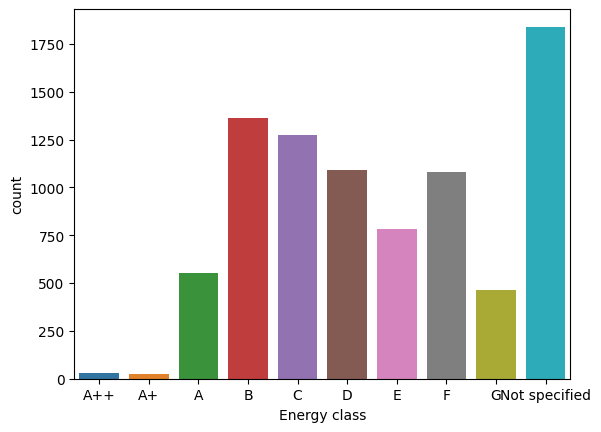

In [30]:
sns.countplot(x="Energy class", data=energy_price_df, order=ordered_E_class)

### Energy Class vs Price

[Text(0.5, 1.0, 'Energy Class versus Price'), Text(0, 0.5, 'Price in €')]

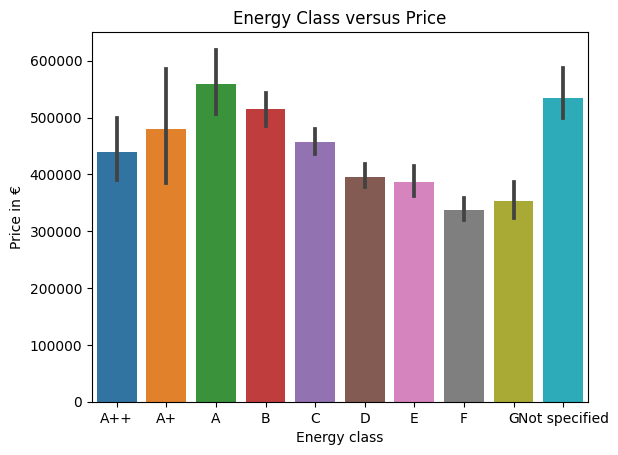

In [31]:
sns.barplot(x="Energy class", y="Price", data=energy_price_df, order=ordered_E_class).set(title = "Energy Class versus Price", ylabel='Price in €')

[Text(0.5, 1.0, 'Energy Class versus Price per Region'),
 Text(0, 0.5, 'Price in €')]

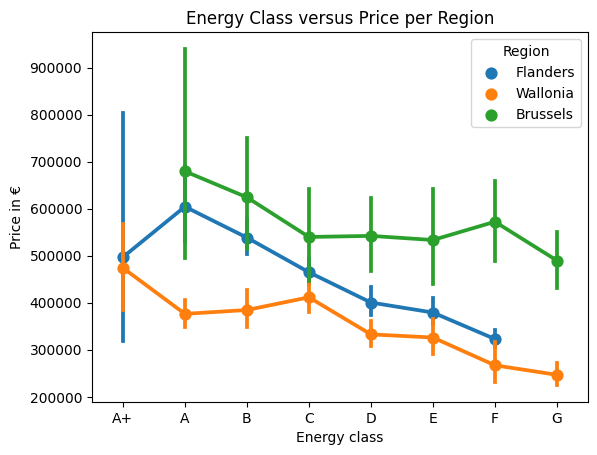

In [32]:
sns.pointplot(x="Energy class", y="Price", hue = "Region",data=energy_price_df, order=ordered_E_class_aplus_to_g,).set(title = "Energy Class versus Price per Region", ylabel='Price in €')

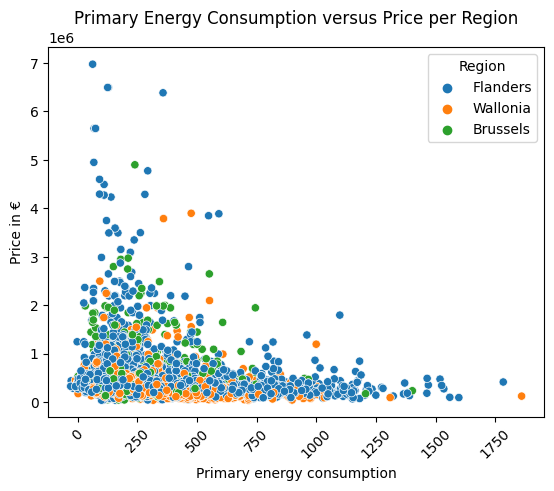

In [33]:
sns.scatterplot(x="Primary energy consumption", y="Price", hue = "Region",data=properties_raw).set(title = "Primary Energy Consumption versus Price per Region", ylabel='Price in €')
plt.xticks(rotation=45)
plt.show()

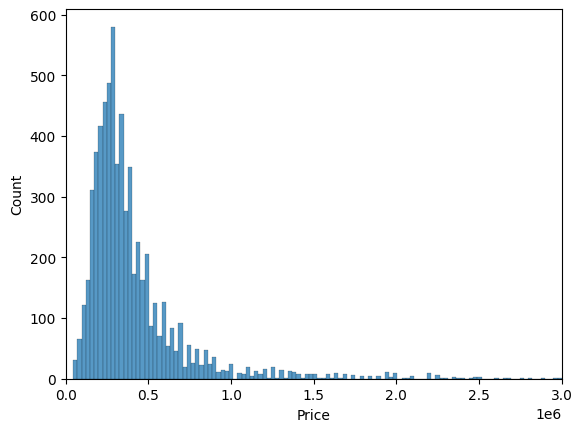

In [34]:
sns.histplot(x="Price", data=properties_raw)
plt.xlim(0, 3000000)
plt.show()

In [35]:
display(properties_raw.head(15))

,property_type,property_subtype,immo code,Location,Postcode,Province,Region,Price,Address,Energy class,...,Construction year,Building condition,Bedrooms,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price_orig
0,house,house,10666428,essen,2910,Antwerpen,Flanders,469000,Heidestatiestraat 26,D,...,0,0,3,1,0,0,2,Installed,0,€469000
1,house,house,10666426,bierges,1301,Brabant wallon,Wallonia,1395000,"Rue de Wavre, 27",C,...,1988,Good,5,2,3,1,4,Hyper equipped,Fuel oil,€1395000
2,apartment,apartment,10666424,arlon,6700,Luxembourg,Wallonia,285000,Avenue de Longwy 340,D,...,0,Good,2,2,0,0,2,Installed,Electric,€285000
3,house,house,10666423,arlon,6700,Luxembourg,Wallonia,285000,Avenue de Longwy 340,D,...,0,Good,2,2,0,0,2,Installed,Electric,€285000
4,apartment,apartment,10666422,antwerp,2000,Antwerpen,Flanders,425000,"Grote steenweg, 511",C,...,0,As new,2,1,0,0,0,Installed,0,€425000
6,house,house,10666419,grace-hollogne,4460,Liï¿½ge,Wallonia,189000,Avenue Louis Libert 1,E,...,1934,Good,2,1,0,0,0,Semi equipped,Fuel oil,€189000
7,house,villa,10666418,aywaille,4920,Liï¿½ge,Wallonia,399999,Avenue Louis Libert 1,C,...,2004,To be done up,4,1,0,1,0,Semi equipped,Fuel oil,€399999
8,house,house,10666417,boom,2850,Antwerpen,Flanders,324000,Goedehoopstraat 21,C,...,0,Good,3,1,0,1,3,0,0,€324000
9,house,mixed-use-building,10666416,boom,2850,Antwerpen,Flanders,324000,Goedehoopstraat 21,C,...,0,Good,3,1,0,1,3,0,0,€324000
10,house,house,10666410,liedekerke,1770,Vlaams-Brabant,Flanders,269000,Affligemsestraat 443,D,...,0,Good,3,1,0,0,2,0,Gas,€269000


## Rename Columns

To improve usability in the API, we rename all variables to be lowercase and with underscores instead of spaces. Therefore, all models have been rerun to reflect these name changes.

In [37]:
properties_raw = properties_raw.rename(columns=({
    "property_type": "property_type",
    "property_subtype": "property_subtype",
    "immo code": "immo_code", 
    "Location": "location", 
    "Postcode": "postcode", 
    "Province": "province",
    "Region": "region", 
    "Price": "price", 
    "Address": "address", 
    "Energy class": "energy_class",
    "Primary energy consumption": "primary_energy_consumption", 
    "Furnished": "furnished", 
    "Terrace": "terrace", 
    "Terrace surface": "terrace_surface", 
    "Surface of the plot": "plot_surface", 
    "Living room surface": "living_room_surface", 
    "Number of frontages": "frontages", 
    "Construction year": "construction_year", 
    "Building condition": "building_condition", 
    "Bedrooms": "bedrooms", 
    "Bathrooms": "bathrooms", 
    "Shower rooms": "shower_rooms", 
    "Office": "office", 
    "Toilets": "toilets", 
    "Kitchen type": "kitchen_type", 
    "Heating type": "heating_type", 
    "Price_orig": "price_orig", 
}))
display(properties_raw.head())

,property_type,property_subtype,immo_code,location,postcode,province,region,price,address,energy_class,...,construction_year,building_condition,bedrooms,bathrooms,shower_rooms,office,toilets,kitchen_type,heating_type,price_orig
0,house,house,10666428,essen,2910,Antwerpen,Flanders,469000,Heidestatiestraat 26,D,...,0,0,3,1,0,0,2,Installed,0,€469000
1,house,house,10666426,bierges,1301,Brabant wallon,Wallonia,1395000,"Rue de Wavre, 27",C,...,1988,Good,5,2,3,1,4,Hyper equipped,Fuel oil,€1395000
2,apartment,apartment,10666424,arlon,6700,Luxembourg,Wallonia,285000,Avenue de Longwy 340,D,...,0,Good,2,2,0,0,2,Installed,Electric,€285000
3,house,house,10666423,arlon,6700,Luxembourg,Wallonia,285000,Avenue de Longwy 340,D,...,0,Good,2,2,0,0,2,Installed,Electric,€285000
4,apartment,apartment,10666422,antwerp,2000,Antwerpen,Flanders,425000,"Grote steenweg, 511",C,...,0,As new,2,1,0,0,0,Installed,0,€425000


In [38]:
#print(properties_raw.columns)
number_cols = list(properties_raw.select_dtypes(include='number'))
print(number_cols)

['immo_code', 'postcode', 'price', 'primary_energy_consumption', 'furnished', 'terrace', 'terrace_surface', 'plot_surface', 'living_room_surface', 'frontages', 'construction_year', 'bedrooms', 'bathrooms', 'shower_rooms', 'office', 'toilets']


## Export Data
The two blocks below can be turned into Code Blocks depending on how you want to export your data. Keep them as markdown if you want to use Run All (Above).

### Overwrite outputfile
"""This codeblock OVERWRITES THE EXISTING OUTPUT FILE"""
data_to_save = properties_raw
reference = ""  #add/change reference (datasource/user). Add leading underscore to increase readability
output_filename = "saved_data" + reference + ".csv" #assemble filename
data_to_save.to_csv(output_filename)

In [39]:
### Export to new timestamped file in /datadump (and overwrite existing output file)
"""This codeblock saves the dataframe in a NEW FILE WITH TIMESTAMP in the /datadump folder"""
data_to_save = properties_raw
data_to_save.to_csv("../data/saved_data.csv") #uncomment this line if you want to overwrite saved_data.csv AND create a timestamped dump
reference = "renamed"    #add/change reference (datasource/user). Add leading underscore to increase readability
timestamp = time.strftime("%Y%m%d-%H%M%S") #add date and time of creation
output_path = "../data/datadump/"     #leave empty to save the file in the same folder as your code, 
output_filename = output_path + "saved_data_" + reference + timestamp  + ".csv" #assemble filename
data_to_save.to_csv(output_filename)